In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
pd.set_option("display.max_columns", None)

# Q1~Q26 

In [4]:
Answers = []
for i in range(1,27):
    Answers.append('Q'+str(i))
print(Answers)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']


In [5]:
Answers2 = []
for i in range(1,21):
    Answers2.append('Q'+str(i))
print(Answers2)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20']


In [6]:
# 결측치 확인
train[Answers].isnull().sum()

Q1     41
Q2     69
Q3     50
Q4     71
Q5     38
Q6     48
Q7     76
Q8     48
Q9     56
Q10    72
Q11    59
Q12    67
Q13    40
Q14    36
Q15    45
Q16    33
Q17    37
Q18    63
Q19    53
Q20    45
Q21    39
Q22    38
Q23    50
Q24    61
Q25    44
Q26    68
dtype: int64

<AxesSubplot:>

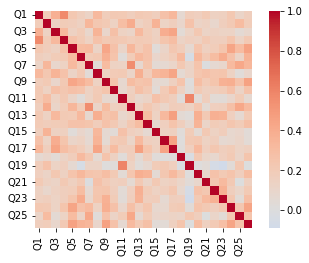

In [7]:
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

<AxesSubplot:>

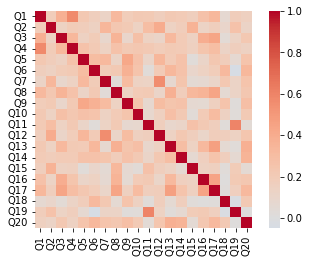

In [8]:
correlations = train[Answers2].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [9]:
from sklearn.impute import KNNImputer

def knull(col):
    imputer = KNNImputer(n_neighbors=3)
    a = imputer.fit_transform(train[col])
    train[col] = a

In [10]:
knull(Answers)

In [11]:
for i in range(len(Answers)):
    test[Answers[i]]=test[Answers[i]].fillna(train[Answers[i]].mode()[0])

In [12]:
test[Answers].isnull().sum()

Q1     0
Q2     0
Q3     0
Q4     0
Q5     0
Q6     0
Q7     0
Q8     0
Q9     0
Q10    0
Q11    0
Q12    0
Q13    0
Q14    0
Q15    0
Q16    0
Q17    0
Q18    0
Q19    0
Q20    0
Q21    0
Q22    0
Q23    0
Q24    0
Q25    0
Q26    0
dtype: int64

In [13]:
train["Mach_mean"] = train[Answers].mean(axis = 1)
test["Mach_mean"] = test[Answers].mean(axis = 1)

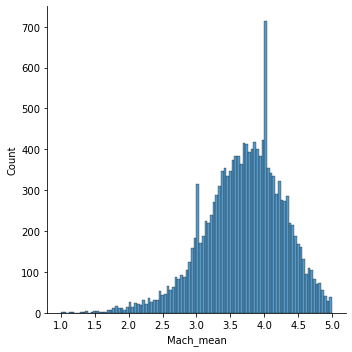

In [14]:
sns.displot(train, x="Mach_mean", bins=100)

In [15]:
Q_secret= ['Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']
           
train['Q_score'] = train[Answers].sum(axis=1)
test['Q_score'] = test[Answers].sum(axis=1)

train['Qs_score'] = train[Q_secret].sum(axis=1)
test['Qs_score'] = test[Q_secret].sum(axis=1)

In [16]:
# Q17 누락 채움
train['T'] = train['Q1'] + train['Q2'] + train['Q3'] + train['Q7'] + train['Q10'] + train['Q12'] + train['Q15'] + train['Q16'] 
train['V'] = train['Q4'] + train['Q5'] + train['Q8'] + train['Q11'] + train['Q13'] + train['Q17'] + train['Q20']
train['M'] = train['Q9'] + train['Q19']

In [17]:
test['T'] = test['Q1'] + test['Q2'] + test['Q3'] + test['Q7'] + test['Q10'] + test['Q12'] + test['Q15'] + test['Q16'] 
test['V'] = test['Q4'] + test['Q5'] + test['Q8'] + test['Q11'] + test['Q13'] + test['Q17'] + test['Q20']
test['M'] = test['Q9'] + test['Q19']

In [18]:
train['Mach_var'] = train[Answers].var(axis = 1)
test['Mach_var'] = test[Answers].var(axis = 1)

In [19]:
test['Q_score'].isnull().sum()

0

In [20]:
nerd = train[train['nerdiness']==1]
notnerd = train[train['nerdiness']==0]

In [21]:
train.drop(Answers, axis = 1, inplace = True)
test.drop(Answers, axis = 1, inplace = True)

<AxesSubplot:xlabel='country', ylabel='count'>

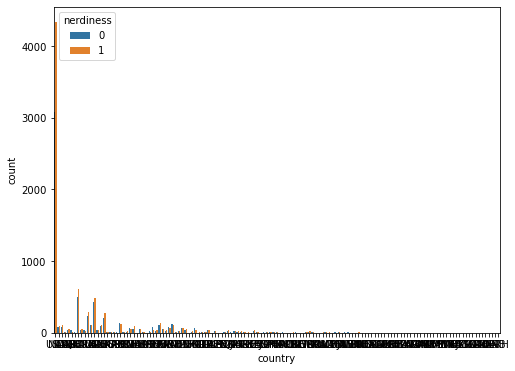

In [22]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'country', hue = train['nerdiness'])

In [23]:
train['country'].isnull().sum()

190

In [24]:
train[train['country'].isnull()]

,index,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Mach_mean,Q_score,Qs_score,T,V,M,Mach_var
66,66,NaN,7,157,157,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,1,1,2.0,3,1.0,1.0,44,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1,3.576923,93.0,23.0,29.0,25.0,6.0,1.453846
79,79,NaN,25,425,218,3.0,1.0,3.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,1,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,3.0,2,1.0,1.0,19,1.0,4.0,1.0,2.0,1.0,5.0,2.0,0,3.615385,94.0,19.0,33.0,23.0,5.0,2.326154
80,80,NaN,8,155,170,2.0,2.0,2.0,5.0,3.0,5.0,4.0,4.0,1.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1.0,2,2.0,2.0,13,1.0,4.0,2.0,2.0,1.0,2.0,2.0,0,3.653846,95.0,21.0,33.0,26.0,5.0,0.795385
149,149,NaN,3,142,198,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,4.0,1.0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,2.0,2,1.0,1.0,55,3.0,2.0,1.0,2.0,3.0,4.0,2.0,0,3.846154,100.0,24.0,33.0,26.0,6.0,1.735385
235,235,NaN,3,304,160,1.0,5.0,5.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,2.0,2,1.0,1.0,23,1.0,2.0,1.0,1.0,1.0,3.0,2.0,1,4.461538,116.0,23.0,40.0,30.0,9.0,1.058462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14853,14853,NaN,3,65,141,3.0,5.0,3.0,2.0,4.0,4.0,2.0,3.0,4.0,3.0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,4.0,2,1.0,1.0,32,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1,4.115385,107.0,26.0,32.0,26.0,9.0,1.306154
14862,14862,NaN,1108,59,123,3.0,2.0,4.0,2.0,5.0,4.0,4.0,3.0,4.0,1.0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,3.0,3,2.0,1.0,22,1.0,1.0,NaN,1.0,1.0,2.0,2.0,0,3.423077,89.0,18.0,29.0,24.0,8.0,1.213846
14896,14896,NaN,3,151,265,1.0,4.0,1.0,5.0,5.0,4.0,4.0,5.0,1.0,1.0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,2,2.0,2.0,16,1.0,6.0,5.0,2.0,1.0,1.0,2.0,1,3.769231,98.0,23.0,28.0,32.0,8.0,1.944615
14962,14962,NaN,1108,59,123,3.0,2.0,4.0,2.0,5.0,4.0,4.0,3.0,4.0,1.0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,3.0,3,2.0,1.0,22,1.0,1.0,NaN,1.0,1.0,2.0,2.0,0,3.423077,89.0,18.0,29.0,24.0,8.0,1.213846


In [25]:
def country_label(data):
    nara = data['country'].copy()
    nara_val = nara.value_counts()
    
    a = [] 
    b = []
    c = []
    d = []
    e = []
    f = []
    g = []

    
    for i in range(len(nara_val)):
        if nara_val.values[i] <= 10 : a.append(nara_val.index[i])
        elif 50>nara_val.values[i] >=10 : b.append(nara_val.index[i])
        elif 100>nara_val.values[i] >= 50 :c.append(nara_val.index[i])
        elif 200>nara_val.values[i] >= 100 : d.append(nara_val.index[i])
        elif 500>=nara_val.values[i] >= 200 :  e.append(nara_val.index[i])
        elif 5000> nara_val.values[i] > 500 : f.append(nara_val.index[i])
        elif nara_val.values[i]  > 5000 : g.append(nara_val.index[i])


    for i in range(len(nara)):
        if nara[i] in a: nara[i]=0
        if nara[i] in b: nara[i]=1
        if nara[i] in c: nara[i]=2
        if nara[i] in d: nara[i]=3
        if nara[i] in e: nara[i]=4
        if nara[i] in f: nara[i]=5
        if nara[i] in g: nara[i]=6
        
    nara.fillna(0, inplace = True)
    return nara

In [26]:
nara_train = country_label(train)
nara_test = country_label(test)

train['nara'] = nara_train
test['nara'] = nara_test

#train = train.drop(columns=['country'], axis = 1)
#test = test.drop(columns=['country'], axis = 1)

<AxesSubplot:xlabel='nara', ylabel='count'>

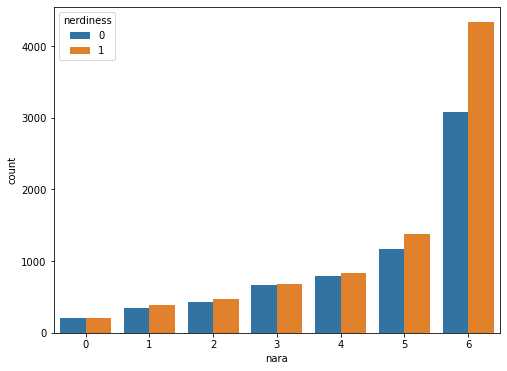

In [27]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'nara', hue = train['nerdiness'])

In [28]:
train[train['country'].isnull()]

,index,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Mach_mean,Q_score,Qs_score,T,V,M,Mach_var,nara
66,66,NaN,7,157,157,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,1,1,2.0,3,1.0,1.0,44,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1,3.576923,93.0,23.0,29.0,25.0,6.0,1.453846,0
79,79,NaN,25,425,218,3.0,1.0,3.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,1,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,3.0,2,1.0,1.0,19,1.0,4.0,1.0,2.0,1.0,5.0,2.0,0,3.615385,94.0,19.0,33.0,23.0,5.0,2.326154,0
80,80,NaN,8,155,170,2.0,2.0,2.0,5.0,3.0,5.0,4.0,4.0,1.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1.0,2,2.0,2.0,13,1.0,4.0,2.0,2.0,1.0,2.0,2.0,0,3.653846,95.0,21.0,33.0,26.0,5.0,0.795385,0
149,149,NaN,3,142,198,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,4.0,1.0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,2.0,2,1.0,1.0,55,3.0,2.0,1.0,2.0,3.0,4.0,2.0,0,3.846154,100.0,24.0,33.0,26.0,6.0,1.735385,0
235,235,NaN,3,304,160,1.0,5.0,5.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,2.0,2,1.0,1.0,23,1.0,2.0,1.0,1.0,1.0,3.0,2.0,1,4.461538,116.0,23.0,40.0,30.0,9.0,1.058462,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14853,14853,NaN,3,65,141,3.0,5.0,3.0,2.0,4.0,4.0,2.0,3.0,4.0,3.0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,4.0,2,1.0,1.0,32,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1,4.115385,107.0,26.0,32.0,26.0,9.0,1.306154,0
14862,14862,NaN,1108,59,123,3.0,2.0,4.0,2.0,5.0,4.0,4.0,3.0,4.0,1.0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,3.0,3,2.0,1.0,22,1.0,1.0,NaN,1.0,1.0,2.0,2.0,0,3.423077,89.0,18.0,29.0,24.0,8.0,1.213846,0
14896,14896,NaN,3,151,265,1.0,4.0,1.0,5.0,5.0,4.0,4.0,5.0,1.0,1.0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,2,2.0,2.0,16,1.0,6.0,5.0,2.0,1.0,1.0,2.0,1,3.769231,98.0,23.0,28.0,32.0,8.0,1.944615,0
14962,14962,NaN,1108,59,123,3.0,2.0,4.0,2.0,5.0,4.0,4.0,3.0,4.0,1.0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,3.0,3,2.0,1.0,22,1.0,1.0,NaN,1.0,1.0,2.0,2.0,0,3.423077,89.0,18.0,29.0,24.0,8.0,1.213846,0


In [29]:
train['nara'].replace(0, np.NaN, inplace = True)

In [30]:
train[train['country'].isnull()]

,index,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Mach_mean,Q_score,Qs_score,T,V,M,Mach_var,nara
66,66,NaN,7,157,157,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,1,1,2.0,3,1.0,1.0,44,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1,3.576923,93.0,23.0,29.0,25.0,6.0,1.453846,NaN
79,79,NaN,25,425,218,3.0,1.0,3.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,1,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,3.0,2,1.0,1.0,19,1.0,4.0,1.0,2.0,1.0,5.0,2.0,0,3.615385,94.0,19.0,33.0,23.0,5.0,2.326154,NaN
80,80,NaN,8,155,170,2.0,2.0,2.0,5.0,3.0,5.0,4.0,4.0,1.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1.0,2,2.0,2.0,13,1.0,4.0,2.0,2.0,1.0,2.0,2.0,0,3.653846,95.0,21.0,33.0,26.0,5.0,0.795385,NaN
149,149,NaN,3,142,198,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,4.0,1.0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,2.0,2,1.0,1.0,55,3.0,2.0,1.0,2.0,3.0,4.0,2.0,0,3.846154,100.0,24.0,33.0,26.0,6.0,1.735385,NaN
235,235,NaN,3,304,160,1.0,5.0,5.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,2.0,2,1.0,1.0,23,1.0,2.0,1.0,1.0,1.0,3.0,2.0,1,4.461538,116.0,23.0,40.0,30.0,9.0,1.058462,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14853,14853,NaN,3,65,141,3.0,5.0,3.0,2.0,4.0,4.0,2.0,3.0,4.0,3.0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,4.0,2,1.0,1.0,32,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1,4.115385,107.0,26.0,32.0,26.0,9.0,1.306154,NaN
14862,14862,NaN,1108,59,123,3.0,2.0,4.0,2.0,5.0,4.0,4.0,3.0,4.0,1.0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,3.0,3,2.0,1.0,22,1.0,1.0,NaN,1.0,1.0,2.0,2.0,0,3.423077,89.0,18.0,29.0,24.0,8.0,1.213846,NaN
14896,14896,NaN,3,151,265,1.0,4.0,1.0,5.0,5.0,4.0,4.0,5.0,1.0,1.0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,2,2.0,2.0,16,1.0,6.0,5.0,2.0,1.0,1.0,2.0,1,3.769231,98.0,23.0,28.0,32.0,8.0,1.944615,NaN
14962,14962,NaN,1108,59,123,3.0,2.0,4.0,2.0,5.0,4.0,4.0,3.0,4.0,1.0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,3.0,3,2.0,1.0,22,1.0,1.0,NaN,1.0,1.0,2.0,2.0,0,3.423077,89.0,18.0,29.0,24.0,8.0,1.213846,NaN


In [31]:
TIPI = []
for i in range(1,11):
    TIPI.append('TIPI'+str(i))

In [32]:
knull(TIPI)

In [33]:
for i in range(len(TIPI)):
    test[TIPI[i]]=test[TIPI[i]].fillna(train[TIPI[i]].mode()[0])

In [34]:
train['Extraverted'] = train['TIPI1'] - train['TIPI6']
train['Warm'] = train['TIPI7']-train['TIPI2']
train['Dependable'] = train['TIPI3']-train['TIPI8']
train['Calm'] = train['TIPI9']-train['TIPI4']
train['OpenMind'] = train['TIPI5']-train['TIPI10']

test['Extraverted'] = test['TIPI1'] - test['TIPI6']
test['Warm'] = test['TIPI7']-test['TIPI2']
test['Dependable'] = test['TIPI3']-test['TIPI8']
test['Calm'] = test['TIPI9']-test['TIPI4']
test['OpenMind'] = test['TIPI5']-test['TIPI10']

In [35]:
# #비율 만들었으니 기존 TIPI drop
train.drop([('TIPI'+str(i)) for i in range(1,10)], axis=1, inplace = True)
train.drop('TIPI10', axis = 1, inplace = True)


test.drop([('TIPI'+str(i)) for i in range(1,10)], axis=1, inplace = True)
test.drop('TIPI10', axis = 1, inplace = True)

In [36]:
VCL = []
for i in range(1,17):
    VCL.append('VCL'+str(i))
print(VCL)

['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16']


In [37]:
# 실제로 있고 진짜 쉬운단어 (작성자의 영어 실력을 알 수 있습니다.)
VCL_1 = ['VCL1','VCL4','VCL5','VCL10','VCL14','VCL16']
# 실제로 있는데 어려운 단어
VCL_2 = ['VCL2','VCL3','VCL7','VCL8','VCL11','VCL13','VCL14']
# 세상에 없는 단어
VCL_3 = ['VCL6','VCL9','VCL12'] # 0 ~ 3 이 나올텐데 3에 가까울 수록 nerdiness일 확률 높다?

In [38]:
dataset = [train,test]
for data in dataset:
    data['VCL_score'] = data[VCL].sum(axis=1)
    data['VCL_1_score'] = data[VCL_1].sum(axis=1)
    data['VCL_2_score'] = data[VCL_2].sum(axis=1)
    data['VCL_3_score'] = data[VCL_3].sum(axis=1)
    data.drop([('VCL'+str(i) )for i in range(1,17)], axis = 1, inplace = True)

In [39]:
train.drop('hand', axis=1, inplace = True)
test.drop('hand', axis=1, inplace = True)

In [40]:
#이상치 제거
train = train.drop(train[train.familysize > 50].index)
test = test.drop(test[test.familysize > 50].index)

In [41]:
train[['familysize','religion','orientation', 'married','voted']].isnull().sum()

familysize     319
religion       245
orientation    399
married         82
voted           85
dtype: int64

In [42]:
knull(['nara','familysize','religion','orientation','married','voted','nerdiness'])

In [43]:
train[['nara','familysize','religion','orientation', 'married','voted']].isnull().sum()

nara           0
familysize     0
religion       0
orientation    0
married        0
voted          0
dtype: int64

In [44]:
train = train.drop(columns=['country'], axis = 1)
test = test.drop(columns=['country'], axis = 1)

In [45]:
age_counts = train['age'].value_counts()
for idx, (val, cnt) in enumerate(age_counts.iteritems(), 1):
    print("Top", idx, ";", val, cnt)

Top 1 ; 18 1386
Top 2 ; 17 1313
Top 3 ; 16 1239
Top 4 ; 19 1101
Top 5 ; 20 932
Top 6 ; 15 899
Top 7 ; 21 833
Top 8 ; 22 663
Top 9 ; 23 605
Top 10 ; 14 533
Top 11 ; 25 478
Top 12 ; 24 437
Top 13 ; 13 353
Top 14 ; 26 349
Top 15 ; 27 325
Top 16 ; 28 306
Top 17 ; 30 236
Top 18 ; 29 233
Top 19 ; 32 186
Top 20 ; 31 177
Top 21 ; 33 161
Top 22 ; 34 153
Top 23 ; 35 142
Top 24 ; 36 141
Top 25 ; 37 121
Top 26 ; 40 110
Top 27 ; 38 101
Top 28 ; 45 99
Top 29 ; 42 96
Top 30 ; 44 83
Top 31 ; 41 80
Top 32 ; 43 77
Top 33 ; 39 75
Top 34 ; 47 75
Top 35 ; 50 73
Top 36 ; 48 69
Top 37 ; 46 69
Top 38 ; 49 64
Top 39 ; 51 58
Top 40 ; 55 57
Top 41 ; 54 47
Top 42 ; 60 46
Top 43 ; 52 45
Top 44 ; 58 43
Top 45 ; 53 37
Top 46 ; 59 33
Top 47 ; 57 33
Top 48 ; 56 33
Top 49 ; 64 29
Top 50 ; 62 22
Top 51 ; 65 21
Top 52 ; 61 20
Top 53 ; 63 19
Top 54 ; 67 15
Top 55 ; 68 12
Top 56 ; 66 10
Top 57 ; 69 8
Top 58 ; 72 6
Top 59 ; 71 5
Top 60 ; 73 3
Top 61 ; 75 3
Top 62 ; 74 3
Top 63 ; 78 3
Top 64 ; 76 2
Top 65 ; 70 2
Top 66 ; 123

In [46]:
#이상치 제거
train = train.drop(train[train.age > 100].index)
test = test.drop(test[test.age > 100].index)

In [47]:
np.log1p(train['age'])

0        3.044522
1        3.912023
2        3.784190
3        2.890372
4        2.944439
           ...   
14995    2.890372
14996    3.828641
14997    3.044522
14998    3.401197
14999    3.091042
Name: age, Length: 14993, dtype: float64

In [48]:
bins = [0, 10, 20, 30,40,50, 60,70,80,90,100]
label = [0,1,2,3,4,5,6,7,8,9]
train['age_cuts'] = pd.cut(train['age'], bins, right=True, labels=label)

<AxesSubplot:xlabel='age_cuts', ylabel='count'>

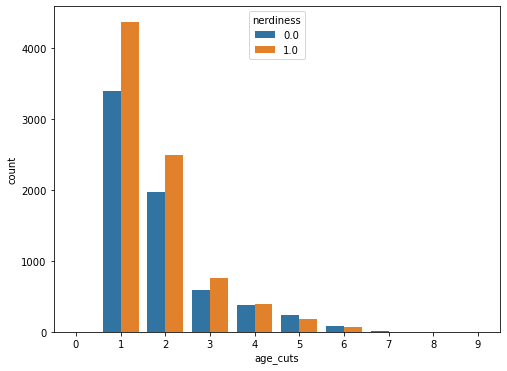

In [49]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='age_cuts', hue = train['nerdiness'])

In [50]:
train = pd.get_dummies(train, columns = ['age_cuts'])

In [51]:
train.drop('age', axis=1, inplace = True)
test.drop('age', axis=1, inplace = True)

In [52]:
elapse = ['introelapse', 'testelapse', 'surveyelapse']

In [53]:
train[elapse]=np.log1p(train[elapse])

In [54]:
def get_outlier(df=None, column=None, weight=1.5): 
    data = df[column]
    quantile_25 = np.percentile(data.values, 25)
    print("25:",quantile_25 )
    quantile_75 = np.percentile(data.values, 75)
    print("75", quantile_75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    print("lowest:",lowest_val )
    highest_val = quantile_75+iqr_weight
    print("highest_val:",highest_val )
    outlier_index= data[(data<lowest_val)|(data>highest_val)].index
    return outlier_index

In [55]:
train['surveyelapse'].sort_values(ascending = False).tail(20) #로그스케일링 후 이상치가 특이하게 튀는거 같지는 않아서 이상치를 굳이 제거하거나 대체?할 필요가 있을까 싶음


6811     2.302585
12311    2.302585
14897    2.197225
12059    2.197225
9736     2.197225
14765    1.945910
5467     1.945910
0        1.945910
12756    1.945910
11990    1.945910
4766     1.791759
1775     1.791759
13237    1.791759
3176     1.791759
6575     1.791759
663      1.609438
738      1.609438
835      1.609438
14037    1.609438
9142     1.386294
Name: surveyelapse, dtype: float64

In [56]:
#걸린시간 합
train['elapse_sum'] = train['testelapse']+train['surveyelapse']
test['elapse_sum'] = test['testelapse']+test['surveyelapse']

In [57]:
#비율 
train['test_dv_survey']=train['testelapse']/train['surveyelapse'] 
test['test_dv_survey']=test['testelapse']/test['surveyelapse'] 

In [58]:
train['ASD'] = train['ASD'].fillna(train['ASD'].mode()[0])
test['ASD'] = test['ASD'].fillna(test['ASD'].mode()[0])

In [59]:
train['education'] = train['education'].fillna(train['education'].mode()[0])
test['education'] = test['education'].fillna(train['education'].mode()[0])

In [60]:
train['engnat'] = train['engnat'].fillna(train['engnat'].mode()[0])
test['engnat'] = test['engnat'].fillna(train['engnat'].mode()[0])

In [61]:
train['gender'] = train['gender'].fillna(train['gender'].mode()[0])
test['gender'] = test['gender'].fillna(train['gender'].mode()[0])

In [62]:
test['religion'] = test['religion'].fillna(train['religion'].mode()[0])
test['orientation'] = test['orientation'].fillna(train['orientation'].mode()[0])
test['voted'] = test['voted'].fillna(train['voted'].mode()[0])
test['married'] = test['married'].fillna(train['married'].mode()[0])
test['familysize'] = test['familysize'].fillna(train['familysize'].mode()[0])


In [63]:
X = train.copy()
X.drop('nerdiness', axis=1, inplace = True)
y = train['nerdiness']

In [64]:
X

,index,introelapse,testelapse,surveyelapse,education,urban,gender,engnat,religion,orientation,voted,married,familysize,ASD,Mach_mean,Q_score,Qs_score,T,V,M,Mach_var,nara,Extraverted,Warm,Dependable,Calm,OpenMind,VCL_score,VCL_1_score,VCL_2_score,VCL_3_score,age_cuts_0,age_cuts_1,age_cuts_2,age_cuts_3,age_cuts_4,age_cuts_5,age_cuts_6,age_cuts_7,age_cuts_8,age_cuts_9,elapse_sum,test_dv_survey
0,0,1.386294,6.317165,1.945910,2.0,1,3.0,1.0,12.0,4.0,2.0,1.0,4.0,2.0,3.653846,95.0,14.0,34.0,31.0,6.0,3.435385,6.0,-1.0,2.0,2.0,4.0,0.0,8,6,2,0,0,1,0,0,0,0,0,0,0,0,8.263075,3.246380
1,1,1.791759,4.454347,4.795791,4.0,2,2.0,1.0,2.0,1.0,1.0,2.0,4.0,2.0,3.269231,85.0,17.0,26.0,25.0,4.0,1.964615,6.0,2.0,3.0,2.0,-3.0,1.0,11,6,5,0,0,0,0,0,1,0,0,0,0,0,9.250138,0.928804
2,2,2.302585,4.691348,4.615121,2.0,1,1.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,3.692308,96.0,16.0,32.0,26.0,9.0,1.981538,3.0,-4.0,1.0,-1.0,4.0,3.0,11,6,5,0,0,0,0,0,1,0,0,0,0,0,9.306468,1.016517
3,3,1.098612,4.804021,4.941642,1.0,3,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,3.500000,91.0,20.0,27.0,25.0,7.0,0.900000,6.0,0.0,1.0,-1.0,-1.0,2.0,9,6,3,0,0,1,0,0,0,0,0,0,0,0,9.745663,0.972151
4,4,1.386294,6.463029,5.379897,1.0,2,2.0,2.0,12.0,1.0,2.0,1.0,1.0,2.0,3.461538,90.0,21.0,31.0,22.0,7.0,0.978462,3.0,-1.0,0.0,0.0,-1.0,2.0,8,6,3,0,0,1,0,0,0,0,0,0,0,0,11.842927,1.201330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2.564949,4.644391,5.087596,2.0,2,2.0,1.0,1.0,3.0,2.0,1.0,3.0,2.0,3.346154,87.0,18.0,31.0,21.0,5.0,1.355385,6.0,-3.0,1.0,1.0,0.0,0.0,11,6,4,1,0,1,0,0,0,0,0,0,0,0,9.731987,0.912885
14996,14996,3.465736,4.672829,5.192957,4.0,1,2.0,2.0,3.0,1.0,1.0,2.0,3.0,2.0,4.038462,105.0,25.0,35.0,27.0,5.0,1.318462,6.0,0.0,2.0,3.0,-3.0,2.0,8,6,2,0,0,0,0,0,1,0,0,0,0,0,9.865786,0.899840
14997,14997,2.890372,4.644391,5.129899,2.0,2,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,4.615385,120.0,24.0,39.0,34.0,8.0,0.566154,6.0,-4.0,0.0,-1.0,-4.0,0.0,9,6,3,0,0,1,0,0,0,0,0,0,0,0,9.774290,0.905357
14998,14998,2.708050,4.234107,4.700480,3.0,2,2.0,1.0,12.0,4.0,2.0,2.0,2.0,1.0,4.115385,107.0,24.0,35.0,24.0,10.0,1.626154,6.0,-4.0,4.0,-1.0,-3.0,3.0,12,6,5,1,0,0,1,0,0,0,0,0,0,0,8.934587,0.900782


In [65]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
14995    0.0
14996    1.0
14997    1.0
14998    0.0
14999    1.0
Name: nerdiness, Length: 14993, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=34)

In [68]:
y_train

807      1.0
2368     1.0
4371     0.0
529      0.0
8775     1.0
        ... 
12028    1.0
5997     0.0
10736    1.0
5246     1.0
11687    0.0
Name: nerdiness, Length: 11994, dtype: float64

In [69]:
index = X_valid['index']
X_train.drop('index', axis = 1, inplace = True)
X_valid.drop('index', axis = 1, inplace = True)
#y_train.drop('index', axis = 1, inplace = True)
#y_valid.drop('index', axis = 1, inplace = True)

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [71]:
k_fold = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [72]:
clf1 = RandomForestClassifier(n_estimators=500)
clf2 = LGBMClassifier()
clf3 = GradientBoostingClassifier()
soft_vote  = VotingClassifier([('r1',clf1), ('r2', clf2), ('r3',clf3)], voting='soft')
soft_vote.fit(X_train, y_train)

VotingClassifier(estimators=[('r1', RandomForestClassifier(n_estimators=500)),
                             ('r2', LGBMClassifier()),
                             ('r3', GradientBoostingClassifier())],
                 voting='soft')

In [73]:
X_valid

,introelapse,testelapse,surveyelapse,education,urban,gender,engnat,religion,orientation,voted,married,familysize,ASD,Mach_mean,Q_score,Qs_score,T,V,M,Mach_var,nara,Extraverted,Warm,Dependable,Calm,OpenMind,VCL_score,VCL_1_score,VCL_2_score,VCL_3_score,age_cuts_0,age_cuts_1,age_cuts_2,age_cuts_3,age_cuts_4,age_cuts_5,age_cuts_6,age_cuts_7,age_cuts_8,age_cuts_9,elapse_sum,test_dv_survey
2899,2.079442,4.736198,4.852030,3.0,3,1.0,1.0,1.0,2.0,1.0,2.0,4.0,2.0,3.615385,94.0,23.0,27.0,23.0,8.0,1.446154,6.0,-1.0,2.0,1.0,0.0,4.0,12,5,6,0,0,0,0,0,0,1,0,0,0,0,9.588229,0.976127
978,1.386294,4.356709,4.753590,3.0,2,2.0,1.0,5.0,2.0,2.0,1.0,3.0,2.0,4.000000,104.0,25.0,33.0,30.0,6.0,1.440000,6.0,-3.0,1.0,-1.0,-3.0,3.0,8,6,2,0,0,0,1,0,0,0,0,0,0,0,9.110299,0.916509
7052,2.890372,4.727388,5.361292,4.0,3,2.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,4.461538,116.0,30.0,34.0,31.0,6.0,1.458462,4.0,-4.0,-2.0,2.0,1.0,4.0,11,6,5,0,0,0,1,0,0,0,0,0,0,0,10.088680,0.881763
820,4.369448,4.644391,5.017280,3.0,2,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,3.730769,97.0,23.0,30.0,24.0,5.0,1.804615,5.0,0.0,0.0,2.0,0.0,1.0,12,6,6,0,0,0,1,0,0,0,0,0,0,0,9.661671,0.925679
11609,7.859027,6.424869,5.288267,3.0,3,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,3.153846,82.0,20.0,29.0,14.0,8.0,1.335385,1.0,-2.0,0.0,1.0,0.0,0.0,11,6,5,0,0,0,1,0,0,0,0,0,0,0,11.713136,1.214929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14932,5.252273,4.779123,4.762174,4.0,2,2.0,1.0,12.0,1.0,1.0,2.0,1.0,2.0,3.807692,99.0,23.0,32.0,24.0,8.0,1.601538,6.0,0.0,4.0,2.0,4.0,3.0,13,6,7,0,0,0,0,0,1,0,0,0,0,0,9.541297,1.003559
13419,5.420535,4.127134,4.356709,2.0,2,1.0,1.0,12.0,1.0,2.0,1.0,2.0,2.0,3.807692,99.0,22.0,30.0,27.0,9.0,1.441538,6.0,3.0,3.0,-4.0,1.0,4.0,14,6,6,2,0,1,0,0,0,0,0,0,0,0,8.483843,0.947306
6629,3.332205,6.472346,5.225747,2.0,2,1.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.846154,100.0,21.0,31.0,29.0,6.0,2.455385,5.0,0.0,1.0,3.0,0.0,2.0,10,6,4,0,0,1,0,0,0,0,0,0,0,0,11.698093,1.238550
10923,5.099866,4.521789,4.356709,2.0,2,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,4.115385,107.0,20.0,36.0,31.0,8.0,0.746154,6.0,-1.0,1.0,-1.0,-3.0,2.0,14,6,6,2,0,0,1,0,0,0,0,0,0,0,8.878497,1.037891


In [74]:
X_train

,introelapse,testelapse,surveyelapse,education,urban,gender,engnat,religion,orientation,voted,married,familysize,ASD,Mach_mean,Q_score,Qs_score,T,V,M,Mach_var,nara,Extraverted,Warm,Dependable,Calm,OpenMind,VCL_score,VCL_1_score,VCL_2_score,VCL_3_score,age_cuts_0,age_cuts_1,age_cuts_2,age_cuts_3,age_cuts_4,age_cuts_5,age_cuts_6,age_cuts_7,age_cuts_8,age_cuts_9,elapse_sum,test_dv_survey
807,1.945910,4.262680,4.430817,2.0,3,2.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,4.000000,104.0,24.0,31.0,27.0,10.0,1.440000,5.0,0.0,0.0,-1.0,0.0,4.0,7,6,1,0,0,1,0,0,0,0,0,0,0,0,8.693497,0.962053
2368,0.693147,4.290459,4.624973,3.0,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,3.115385,81.0,17.0,25.0,21.0,4.0,1.946154,6.0,0.0,0.0,4.0,-1.0,1.0,10,6,4,0,0,0,1,0,0,0,0,0,0,0,8.915432,0.927672
4371,6.398595,4.276666,4.672829,2.0,3,1.0,1.0,12.0,1.0,1.0,1.0,2.0,2.0,3.230769,84.0,16.0,30.0,23.0,7.0,0.904615,2.0,0.0,0.0,0.0,-1.0,0.0,8,5,3,0,0,0,1,0,0,0,0,0,0,0,8.949495,0.915220
529,1.791759,4.605170,4.934474,3.0,3,1.0,1.0,1.0,3.0,1.0,1.0,5.0,2.0,3.461538,90.0,15.0,31.0,25.0,5.0,2.178462,5.0,-1.0,2.0,2.0,3.0,4.0,13,6,7,0,0,0,0,0,0,1,0,0,0,0,9.539644,0.933265
8775,1.386294,4.356709,5.187386,3.0,1,2.0,1.0,12.0,1.0,2.0,1.0,2.0,2.0,3.769231,98.0,25.0,27.0,27.0,6.0,1.144615,4.0,-1.0,3.0,0.0,1.0,2.0,11,6,5,0,0,0,0,0,1,0,0,0,0,0,9.544095,0.839866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12028,2.708050,4.564348,4.948760,4.0,3,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.846154,100.0,21.0,36.0,23.0,8.0,1.095385,3.0,-1.0,-1.0,1.0,1.0,3.0,13,6,7,0,0,0,0,1,0,0,0,0,0,0,9.513108,0.922322
5997,3.218876,4.499810,5.323010,2.0,2,2.0,1.0,7.0,2.0,2.0,2.0,2.0,2.0,3.923077,102.0,22.0,34.0,26.0,9.0,1.273846,6.0,0.0,2.0,0.0,-3.0,2.0,10,6,4,0,0,0,1,0,0,0,0,0,0,0,9.822820,0.845351
10736,1.791759,4.317488,4.262680,2.0,1,2.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,4.115385,107.0,23.0,34.0,30.0,9.0,1.386154,6.0,-4.0,-2.0,-4.0,-4.0,0.0,9,6,3,0,0,1,0,0,0,0,0,0,0,0,8.580168,1.012858
5246,5.860786,4.204693,4.890349,1.0,2,2.0,1.0,2.0,2.0,2.0,1.0,3.0,1.0,4.000000,104.0,18.0,34.0,30.0,7.0,1.680000,6.0,-2.0,1.0,-2.0,-2.0,0.0,11,6,5,0,0,1,0,0,0,0,0,0,0,0,9.095042,0.859794


In [75]:
y_train

807      1.0
2368     1.0
4371     0.0
529      0.0
8775     1.0
        ... 
12028    1.0
5997     0.0
10736    1.0
5246     1.0
11687    0.0
Name: nerdiness, Length: 11994, dtype: float64

In [76]:
X_valid

,introelapse,testelapse,surveyelapse,education,urban,gender,engnat,religion,orientation,voted,married,familysize,ASD,Mach_mean,Q_score,Qs_score,T,V,M,Mach_var,nara,Extraverted,Warm,Dependable,Calm,OpenMind,VCL_score,VCL_1_score,VCL_2_score,VCL_3_score,age_cuts_0,age_cuts_1,age_cuts_2,age_cuts_3,age_cuts_4,age_cuts_5,age_cuts_6,age_cuts_7,age_cuts_8,age_cuts_9,elapse_sum,test_dv_survey
2899,2.079442,4.736198,4.852030,3.0,3,1.0,1.0,1.0,2.0,1.0,2.0,4.0,2.0,3.615385,94.0,23.0,27.0,23.0,8.0,1.446154,6.0,-1.0,2.0,1.0,0.0,4.0,12,5,6,0,0,0,0,0,0,1,0,0,0,0,9.588229,0.976127
978,1.386294,4.356709,4.753590,3.0,2,2.0,1.0,5.0,2.0,2.0,1.0,3.0,2.0,4.000000,104.0,25.0,33.0,30.0,6.0,1.440000,6.0,-3.0,1.0,-1.0,-3.0,3.0,8,6,2,0,0,0,1,0,0,0,0,0,0,0,9.110299,0.916509
7052,2.890372,4.727388,5.361292,4.0,3,2.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,4.461538,116.0,30.0,34.0,31.0,6.0,1.458462,4.0,-4.0,-2.0,2.0,1.0,4.0,11,6,5,0,0,0,1,0,0,0,0,0,0,0,10.088680,0.881763
820,4.369448,4.644391,5.017280,3.0,2,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,3.730769,97.0,23.0,30.0,24.0,5.0,1.804615,5.0,0.0,0.0,2.0,0.0,1.0,12,6,6,0,0,0,1,0,0,0,0,0,0,0,9.661671,0.925679
11609,7.859027,6.424869,5.288267,3.0,3,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,3.153846,82.0,20.0,29.0,14.0,8.0,1.335385,1.0,-2.0,0.0,1.0,0.0,0.0,11,6,5,0,0,0,1,0,0,0,0,0,0,0,11.713136,1.214929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14932,5.252273,4.779123,4.762174,4.0,2,2.0,1.0,12.0,1.0,1.0,2.0,1.0,2.0,3.807692,99.0,23.0,32.0,24.0,8.0,1.601538,6.0,0.0,4.0,2.0,4.0,3.0,13,6,7,0,0,0,0,0,1,0,0,0,0,0,9.541297,1.003559
13419,5.420535,4.127134,4.356709,2.0,2,1.0,1.0,12.0,1.0,2.0,1.0,2.0,2.0,3.807692,99.0,22.0,30.0,27.0,9.0,1.441538,6.0,3.0,3.0,-4.0,1.0,4.0,14,6,6,2,0,1,0,0,0,0,0,0,0,0,8.483843,0.947306
6629,3.332205,6.472346,5.225747,2.0,2,1.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.846154,100.0,21.0,31.0,29.0,6.0,2.455385,5.0,0.0,1.0,3.0,0.0,2.0,10,6,4,0,0,1,0,0,0,0,0,0,0,0,11.698093,1.238550
10923,5.099866,4.521789,4.356709,2.0,2,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,4.115385,107.0,20.0,36.0,31.0,8.0,0.746154,6.0,-1.0,1.0,-1.0,-3.0,2.0,14,6,6,2,0,0,1,0,0,0,0,0,0,0,8.878497,1.037891


In [77]:
index

2899      2899
978        978
7052      7052
820        820
11609    11609
         ...  
14932    14932
13419    13419
6629      6629
10923    10923
791        791
Name: index, Length: 2999, dtype: int64

In [78]:
model = soft_vote
pred_y = model.predict_proba(X_valid)
pred_y = pred_y[:,1]

submission = pd.DataFrame({
    "index" : index,
    "nerdiness" : pred_y
})
submission.to_csv('model1.csv', index=False)

In [79]:
pred_y

array([0.50686063, 0.68270067, 0.77062837, ..., 0.75436268, 0.79929395,
       0.569995  ])

In [80]:
def lgbm_rfe_1(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=4040)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)        
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [82]:
lgbm_archive_1 = lgbm_rfe_1(X_train, y_train)

42 0.8050801909588138


In [87]:
model = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_1 = X_train[lgbm_archive_1.iloc[0,2]]

model.fit(x_train_1, y_train)

pred_y1 = model.predict_proba(X_valid[lgbm_archive_1.iloc[0,2]])
pred_y1 = pred_y1[:,1]

In [88]:
def lgbm_rfe_2(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=1234)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [89]:
lgbm_archive_2 = lgbm_rfe_2(X_train, y_train)

42 0.8174646658209856


In [93]:
model2 = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_2 = X_train[lgbm_archive_2.iloc[0,2]]

model2.fit(x_train_2, y_train)

pred_y2 = model2.predict_proba(X_valid[lgbm_archive_2.iloc[0,2]])
pred_y2 = pred_y2[:,1]

In [94]:
def lgbm_rfe_3(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=99087)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [95]:
lgbm_archive_3 = lgbm_rfe_3(X_train, y_train)

42 0.8089217717662522
